In [31]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 

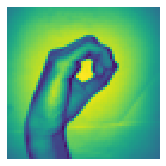

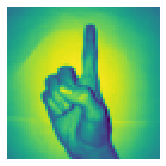

In [32]:
x_l = np.load('dataset/X.npy')
y_l = np.load('dataset/Y.npy')
img_size = 64
plt.subplot(1,2,1)
plt.imshow(x_l[260].reshape(img_size,img_size))
plt.axis('off')
plt.show()
plt.subplot(1,2,1)
plt.imshow(x_l[900].reshape(img_size,img_size))
plt.axis('off')
plt.show()

In [33]:
x = np.concatenate((x_l[204:409],x_l[822:1027]),axis = 0)
z = np.zeros(205)
o = np.ones(205)
y = np.concatenate((z,o),axis=0).reshape(x.shape[0],1)

In [34]:
print('X shape : {} , Y shape: {}'.format(x.shape,y.shape))

X shape : (410, 64, 64) , Y shape: (410, 1)


In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]
print('Num of train {} and test {}'.format(number_of_train,number_of_test))

Num of train 307 and test 103


In [36]:
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1] * x_train.shape[2])
x_test_flatten = x_test.reshape(number_of_test,x_test.shape[1] * x_test.shape[2])
print('X train flatten: {} , X test flatten: {}'.format(x_train_flatten.shape,x_test_flatten.shape))

X train flatten: (307, 4096) , X test flatten: (103, 4096)


In [37]:
x_train = x_train_flatten.T
x_test = x_test_flatten.T
print('x train :{} , x test: {} , y train: {} , y test: {}'.format(x_train.shape,x_test.shape,y_train.shape,y_test.shape))

x train :(4096, 307) , x test: (4096, 103) , y train: (307, 1) , y test: (103, 1)


<font color='purple'>
What we did up to this point:
* Choose our labels (classes) that are sign zero and sign one
* Create and flatten train and test sets
* Our final inputs(images) and outputs(labels or classes) looks like this:
<a href="http://ibb.co/bWMK7c"><img src="http://image.ibb.co/fOqCSc/3.png" alt="3" border="0"></a>

# LOGISTIC REGRESSION

Cost after iteration 0: 4194.729242
Cost after iteration 10: 0.000085
Cost after iteration 20: 0.000085
Cost after iteration 30: 0.000085
Cost after iteration 40: 0.000085
Cost after iteration 50: 0.000085
Cost after iteration 60: 0.000085
Cost after iteration 70: 0.000085
Cost after iteration 80: 0.000085
Cost after iteration 90: 0.000085
Cost after iteration 100: 0.000085
Cost after iteration 110: 0.000085
Cost after iteration 120: 0.000085
Cost after iteration 130: 0.000085
Cost after iteration 140: 0.000085


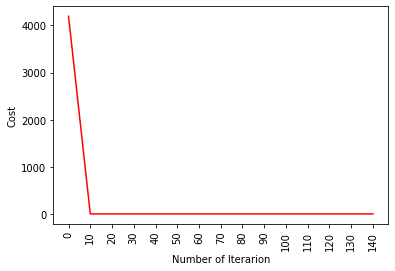

test accuracy : 55.33980582524271%


In [38]:
# initializing params
def initializeWeightsBias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

def forwardPropagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    return cost  

def forwardBackwardPropagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] 
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    for i in range(number_of_iterarion):
        cost,gradients = forwardBackwardPropagation(w,b,x_train,y_train)
        cost_list.append(cost)
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2,color='red')
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

def logisticRegression(x_train,y_train,x_test,y_test,learning_rate,num_iterations):
    dimension = x_train.shape[0]
    w,b = initializeWeightsBias(dimension)

    parameters,gradients,cost_list = update(w,b,x_train,y_train,learning_rate,num_iterations)

    y_prediction = predict(parameters['weight'],parameters['bias'],x_test)

    print('test accuracy : {}%'.format(np.mean(np.abs(y_prediction - y_test)) * 100))
    
logisticRegression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)

# with SKLEARN

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42,max_iter=150)
lr.fit(x_train_flatten,y_train)
print(lr.score(x_test_flatten,y_test))

0.9805825242718447


In [40]:
y_train.shape

(307, 1)

In [41]:
x_train.shape

(4096, 307)

<h1>Artifical Neural Network</h1>

In [42]:
# def initializeParametersLayerSizesNN(x_train,y_train):
#     parameters = {"weight1":np.random.randn(3,x_train.shape[0]) * 0.1,
#                   "bias1":np.zeros((3,1)),
#                   "weight2":np.random.randn(y_train.shape[1],3) * 0.1,
#                   "bias2":np.zeros((y_train.shape[0],1))}
#     return parameters

def initializeParametersLayerSizesNN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                 "bias1": np.zeros((3,1)),
                 "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

In [43]:
def forwardPropagationNN(x_train,parameters):
    Z1 = np.dot(parameters['weight1'],x_train) + parameters['bias1']
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters['weight2'],A1) + parameters['bias2']
    A2 = sigmoid(Z2)

    cache = {'Z1':Z1,'A1':A1,'Z2':Z2,'A2':A2}
    return A2,cache

In [44]:
def computeCostNN(A2,Y,parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -(np.sum(logprobs)/Y.shape[1])
    return cost

In [45]:
def backwardPropagationNN(parameters , cache , X, Y):
    dZ2 = cache["A2"] - Y
    dW2 = np.dot(dZ2,cache['A1'].T)/X.shape[1]
    db2 = np.sum(dZ2,axis = 1, keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2) * (1- np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis = 1, keepdims=True)/X.shape[1]
    grads = {"dweight1":dW1,"dbias1":db1,"dweight2":dW2,"dbias2":db2}
    return grads



In [58]:
def updateParametersNN(parameters,grads,learning_rate=1.5):
    parameters = {"weight1":parameters['weight1']-learning_rate*grads['dweight1'],
                  "bias1":parameters['bias1'] - learning_rate*grads['dbias1'],
                  "weight2":parameters['weight2'] - learning_rate*grads['dweight2'],
                  "bias2":parameters["bias2"] - learning_rate*grads["dbias2"]}
    return parameters

In [59]:
def predictNN(parameters,x_test):
    A2,cache = forwardPropagationNN(x_test,parameters)
    y_prediction = np.zeros((1,x_test.shape[1]))
    for i in range(A2.shape[1]):
        if (A2[0,i] <= 0.5):
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

Cost after iteration 0: 33997.478847
Cost after iteration 100: 79.959617
Cost after iteration 200: 40.279888
Cost after iteration 300: 26.929053
Cost after iteration 400: 20.227290
Cost after iteration 500: 16.197197
Cost after iteration 600: 13.506517
Cost after iteration 700: 11.582595
Cost after iteration 800: 10.138522
Cost after iteration 900: 9.014667
Cost after iteration 1000: 8.115141
Cost after iteration 1100: 7.378867
Cost after iteration 1200: 6.765098
Cost after iteration 1300: 6.245605
Cost after iteration 1400: 5.800214
Cost after iteration 1500: 5.414124
Cost after iteration 1600: 5.076232
Cost after iteration 1700: 4.778041
Cost after iteration 1800: 4.512942
Cost after iteration 1900: 4.275716
Cost after iteration 2000: 4.062186
Cost after iteration 2100: 3.868971
Cost after iteration 2200: 3.693302
Cost after iteration 2300: 3.532894
Cost after iteration 2400: 3.385841
Cost after iteration 2500: 3.250541
Cost after iteration 2600: 3.125640
Cost after iteration 2700: 3

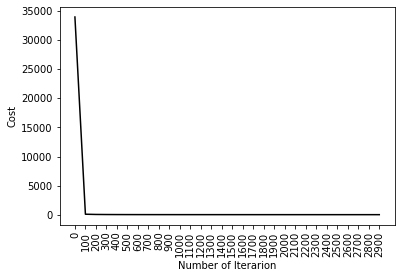

test accuracy: 44.66019417475729 %


In [60]:
def twoLayersNN(x_train,y_train,x_test,y_test,num_iterations):
    cost_list = []
    index_list = []
    parameters = initializeParametersLayerSizesNN(x_train,y_train)
    for i in range(0,num_iterations):
        A2,cache = forwardPropagationNN(x_train,parameters)
        cost = computeCostNN(A2,y_train,parameters)
        grads = backwardPropagationNN(parameters,cache,x_train,y_train)
        parameters = updateParametersNN(parameters,grads)

        if(i % 100 ==0):
            cost_list.append(cost)
            index_list.append(i)
            print("Cost after iteration %i: %f" %(i,cost))
    plt.plot(index_list,cost_list,color='black')
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()

    y_prediction_test = predictNN(parameters,x_test)

    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

    return parameters
parameters = twoLayersNN(x_train,y_train,x_test,y_test,num_iterations=3000)

<h1>Artifical Neural Network with Keras</h1>

In [83]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense 
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform',activation = 'relu',input_dim = x_train.shape[0]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform',activation = 'sigmoid'))
    classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn=build_classifier,epochs = 100)
accuracies = cross_val_score(estimator=classifier, X = x_train.T , y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print(f'Accuracy mean : {str(mean)} , Accuracy variance: {str(variance)}')

p - loss: 0.6663 - accuracy: 0.6439
Epoch 10/100
205/205 [==============================] - 0s 97us/step - loss: 0.6515 - accuracy: 0.5317
Epoch 11/100
205/205 [==============================] - 0s 90us/step - loss: 0.6353 - accuracy: 0.6439
Epoch 12/100
205/205 [==============================] - 0s 82us/step - loss: 0.6131 - accuracy: 0.6780
Epoch 13/100
205/205 [==============================] - 0s 88us/step - loss: 0.5925 - accuracy: 0.6537
Epoch 14/100
205/205 [==============================] - 0s 77us/step - loss: 0.5732 - accuracy: 0.6927
Epoch 15/100
205/205 [==============================] - 0s 97us/step - loss: 0.5531 - accuracy: 0.8488
Epoch 16/100
205/205 [==============================] - 0s 94us/step - loss: 0.5315 - accuracy: 0.7463
Epoch 17/100
205/205 [==============================] - 0s 114us/step - loss: 0.5012 - accuracy: 0.8146
Epoch 18/100
205/205 [==============================] - 0s 75us/step - loss: 0.4996 - accuracy: 0.8488
Epoch 19/100
205/205 [==============

<h1>Convolutional Neural Networks</h1>